In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#SCALLING STANDRIZATION


In [8]:
dic=pd.DataFrame({ 'age':[39,38,37,41,40,35,36,42,43,44],'Estimatedsalary':[77000,78000,80000,74000,75000,81000,82000,84000,85000,76000],'purchased':[0,0,1,1,0,1,0,0,1,1]})

In [11]:
dic

,age,Estimatedsalary,purchased
0,39,77000,0
1,38,78000,0
2,37,80000,1
3,41,74000,1
4,40,75000,0
5,35,81000,1
6,36,82000,0
7,42,84000,0
8,43,85000,1
9,44,76000,1


In [13]:
dic.sample(5)

,age,Estimatedsalary,purchased
0,39,77000,0
2,37,80000,1
1,38,78000,0
6,36,82000,0
9,44,76000,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# assuming 'df' is your DataFrame and 'target' is your target variable
X = dic.drop('purchased', axis=1)
y = dic['purchased']

# split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# now you can use x_train
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [17]:
scaler.mean_

array([3.92857143e+01, 7.88571429e+04])

In [19]:
x_train_scaled

array([[ 1.56611069, -0.86226123],
       [-0.4271211 , -0.25867837],
       [-1.0915317 ,  0.94848735],
       [ 0.9017001 ,  1.55207021],
       [ 0.5694948 , -1.46584409],
       [-0.0949158 , -0.5604698 ],
       [-1.42373699,  0.64669592]])

In [21]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)                           

In [23]:
x_train_scaled

,age,Estimatedsalary
0,1.566111,-0.862261
1,-0.427121,-0.258678
2,-1.091532,0.948487
3,0.901700,1.552070
4,0.569495,-1.465844
5,-0.094916,-0.560470
6,-1.423737,0.646696


In [25]:
np.round(x_train_scaled.describe(), 1)

,age,Estimatedsalary
count,7.0,7.0
mean,0.0,0.0
std,1.1,1.1
min,-1.4,-1.5
25%,-0.8,-0.7
50%,-0.1,-0.3
75%,0.7,0.8
max,1.6,1.6


In [27]:
print(type(x_train_scaled))  # Check the data type
print(x_train_scaled.shape)  # Check the shape




<class 'pandas.core.frame.DataFrame'>
(7, 2)


<Axes: xlabel='age', ylabel='Estimatedsalary'>

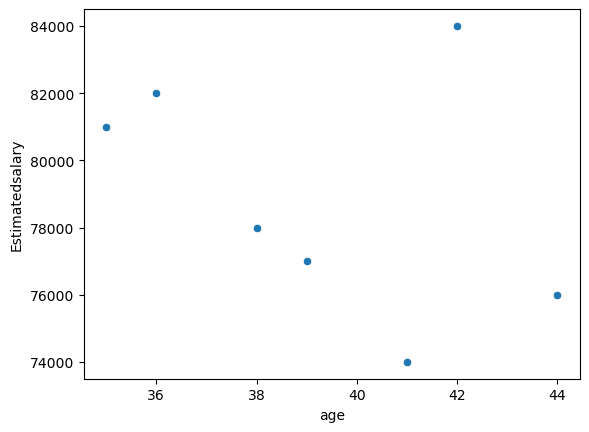

In [29]:

sns.scatterplot(x='age', y='Estimatedsalary', data=x_train)




<Axes: xlabel='age', ylabel='Estimatedsalary'>

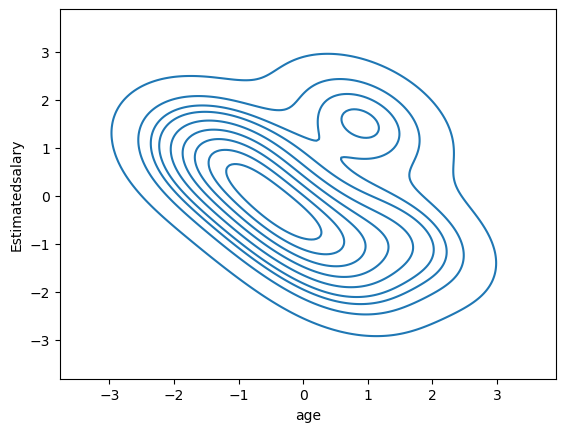

In [31]:
sns.kdeplot(x='age', y='Estimatedsalary', data=x_train_scaled)


In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [35]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [37]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [39]:
from sklearn.metrics import accuracy_score

In [41]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))      

Actual 0.0
scaled 0.0


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [51]:
dt=dt.fit(x_train,y_train)
dt=dt_scaled.fit(x_train_scaled,y_train)

In [53]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [55]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))      

Actual 0.3333333333333333
scaled 0.0
